# Generalized Beta Distribution Example

This notebook demonstrates the usage of the GeneralizedBetaDistribution class, showing various properties and visualizations of the distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mitoolspro.regressions.distributions import GeneralizedBetaDistribution

## Basic Usage

Let's create a standard beta distribution (α=2, β=2) on the interval [0,1]

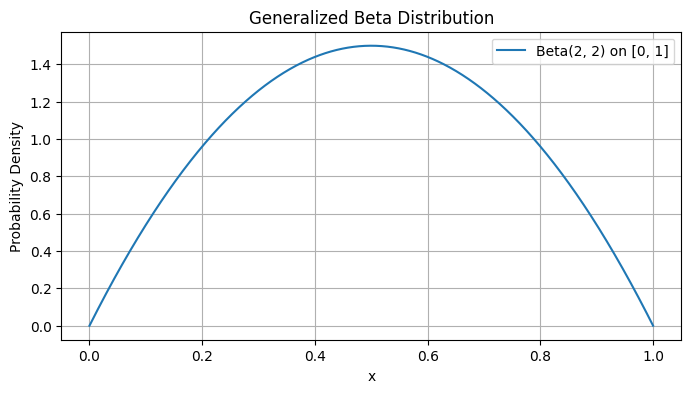

In [2]:
beta_dist = GeneralizedBetaDistribution(alpha=2, beta=2, a=0, b=1)
beta_dist.plot_pdf()

## Different Parameter Combinations

Let's explore how different α and β parameters affect the shape of the distribution.

/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/mitoolspro/regressions/distributions.py:35: RuntimeWarning: divide by zero encountered in power
  (x[mask] - self.a) ** (self.alpha - 1)
/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/mitoolspro/regressions/distributions.py:36: RuntimeWarning: divide by zero encountered in power
  * (self.b - x[mask]) ** (self.beta - 1)


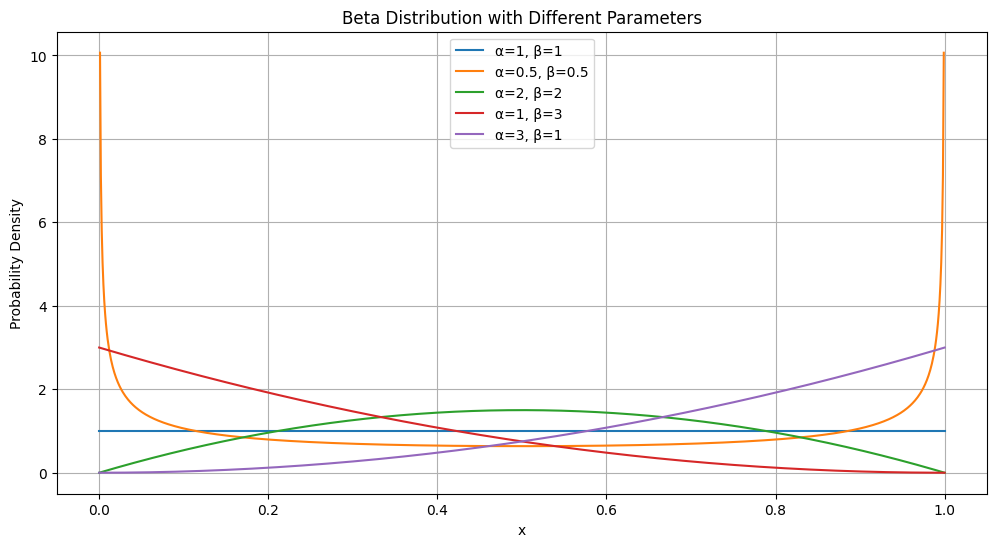

In [3]:
plt.figure(figsize=(12, 6))

x = np.linspace(0, 1, 1000)

params = [
    (1, 1),    # Uniform
    (0.5, 0.5),  # U-shaped
    (2, 2),    # Bell-shaped
    (1, 3),    # Right-skewed
    (3, 1),    # Left-skewed
]

for alpha, beta in params:
    dist = GeneralizedBetaDistribution(alpha=alpha, beta=beta, a=0, b=1)
    plt.plot(x, dist.pdf_vectorized(x), label=f'α={alpha}, β={beta}')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Beta Distribution with Different Parameters')
plt.legend()
plt.grid(True)
plt.show()

## Generalized Beta Distribution

Now let's see how the distribution changes when we modify the support interval [a,b].

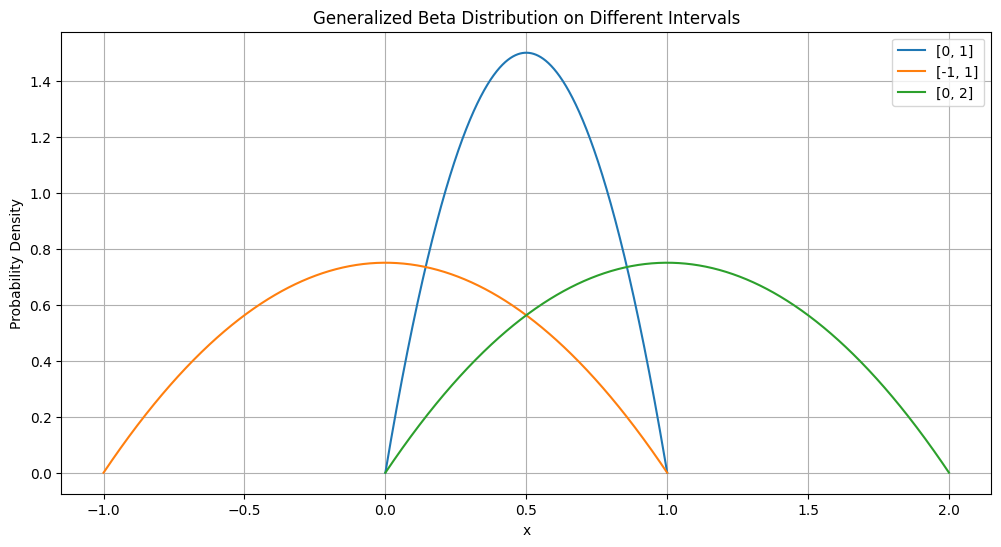

In [4]:
plt.figure(figsize=(12, 6))

alpha, beta = 2, 2
intervals = [
    (0, 1),    # Standard beta
    (-1, 1),   # Centered around 0
    (0, 2),    # Wider interval
]

for a, b in intervals:
    dist = GeneralizedBetaDistribution(alpha=alpha, beta=beta, a=a, b=b)
    x = np.linspace(a, b, 1000)
    plt.plot(x, dist.pdf_vectorized(x), label=f'[{a}, {b}]')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Generalized Beta Distribution on Different Intervals')
plt.legend()
plt.grid(True)
plt.show()

## Computing PDF Values

We can compute PDF values for single points or arrays of points.

In [5]:
dist = GeneralizedBetaDistribution(alpha=2, beta=2, a=0, b=1)

# Single point (using cached scalar version)
x = 0.5
print(f'PDF at x={x}: {dist.pdf(x)}')

# Array of points (using vectorized version)
x_array = np.array([0.2, 0.5, 0.8])
print(f'PDF at points {x_array}: {dist.pdf_vectorized(x_array)}')

PDF at x=0.5: 1.5
PDF at points [0.2 0.5 0.8]: [0.96 1.5  0.96]


## Out of Bounds Behavior

The PDF returns 0 for values outside the support interval.

In [6]:
dist = GeneralizedBetaDistribution(alpha=2, beta=2, a=0, b=1)
x = np.array([-1, 0, 0.5, 1, 2])
print(f'PDF values at {x}: {dist.pdf_vectorized(x)}')

PDF values at [-1.   0.   0.5  1.   2. ]: [0.  0.  1.5 0.  0. ]


***